#### **Gradient Boosting**

In [ ]:
# Bunun temel amacı performansı 2. plana atıp en iyi doğruluğa ulaşmaya çalışıyor 
# AdaBoost biraz daha kardeşim sen beni kullandında az da performansı da düşünek diyor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### **Train Test Split**

In [4]:
X = pd.get_dummies(df.drop("class", axis=1), drop_first= True)
y = df["class"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

#### **Grid Search and GBoost**

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {
        "n_estimators" : [1, 3, 5, 10, 20, 50, 100],
        "max_depth" : [2, 3, 4, 5, 6]
    }

In [10]:
grad_boost = GradientBoostingClassifier()

In [11]:
grid = GridSearchCV(grad_boost, parameters)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 20, 50, 100]})

In [13]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [14]:
mantar_pred = grid.predict(X_test)

### **Metrikler**

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

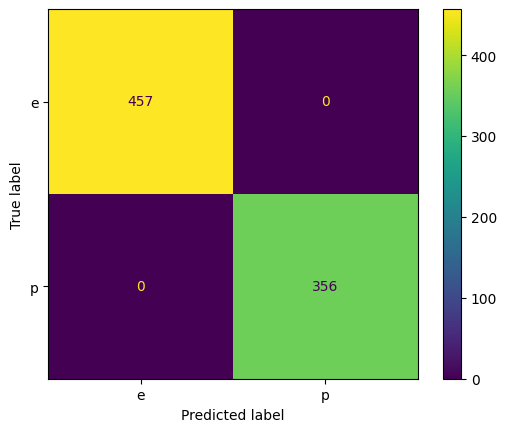

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test, y_test)

# Model hiç hata bulmadı OverFitting yapmış olabiliriz ama yapmadığımızı nereden biliyoruz:



# hata_orani = []

# for mantar_est in range(1, 30):
#     model = AdaBoostClassifier(n_estimators= mantar_est)
#     model.fit(X_train, y_train)

#     mantar_deneme_pred = model.predict(X_test)

#     hata = 1 - accuracy_score(y_test, mantar_deneme_pred)
#     hata_orani.append(hata)

# AdaBoost içinde en iyi estimators(ağaç sayısı) bulmaya çalışırken 15 den sonra hata oranımızın neredeyse 0 a indiğini gözlemlemiştik o yüzden biliyoruz

In [17]:
print(classification_report(y_test, mantar_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [18]:
feat = grid.best_estimator_.feature_importances_

In [19]:
feat_df = pd.DataFrame(index= X.columns, 
    columns = ["Katsayi"], data=feat)

In [20]:
feat_df

,Katsayi
cap-shape_c,1.199477e-04
cap-shape_f,6.616284e-17
cap-shape_k,4.637135e-19
cap-shape_s,0.000000e+00
cap-shape_x,5.416406e-17
...,...
habitat_l,2.648295e-08
habitat_m,4.954678e-16
habitat_p,0.000000e+00
habitat_u,5.869194e-05


In [21]:
# Bazı featureslar 0 model diyor ki benim bunu kaale almama gerek yok o yüzden 0 aq
feat_df.sort_values("Katsayi", ascending=True).transpose()

,habitat_w,odor_y,stalk-color-above-ring_g,veil-color_w,veil-color_o,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,...,gill-spacing_w,spore-print-color_h,odor_f,odor_l,spore-print-color_r,stalk-root_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
Katsayi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010022,0.010683,0.010871,0.022198,0.031951,0.034116,0.035471,0.059798,0.13013,0.612097


In [22]:
feat_df = feat_df[feat_df["Katsayi"] > 0.001]

In [23]:
feat_df.sort_values("Katsayi", ascending=True).transpose()

,odor_c,cap-surface_g,population_c,ring-number_o,cap-color_y,odor_m,stalk-color-below-ring_y,spore-print-color_u,odor_p,stalk-root_e,...,gill-spacing_w,spore-print-color_h,odor_f,odor_l,spore-print-color_r,stalk-root_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
Katsayi,0.00101,0.001578,0.001641,0.001929,0.002118,0.002359,0.002939,0.003898,0.004363,0.005701,...,0.010022,0.010683,0.010871,0.022198,0.031951,0.034116,0.035471,0.059798,0.13013,0.612097


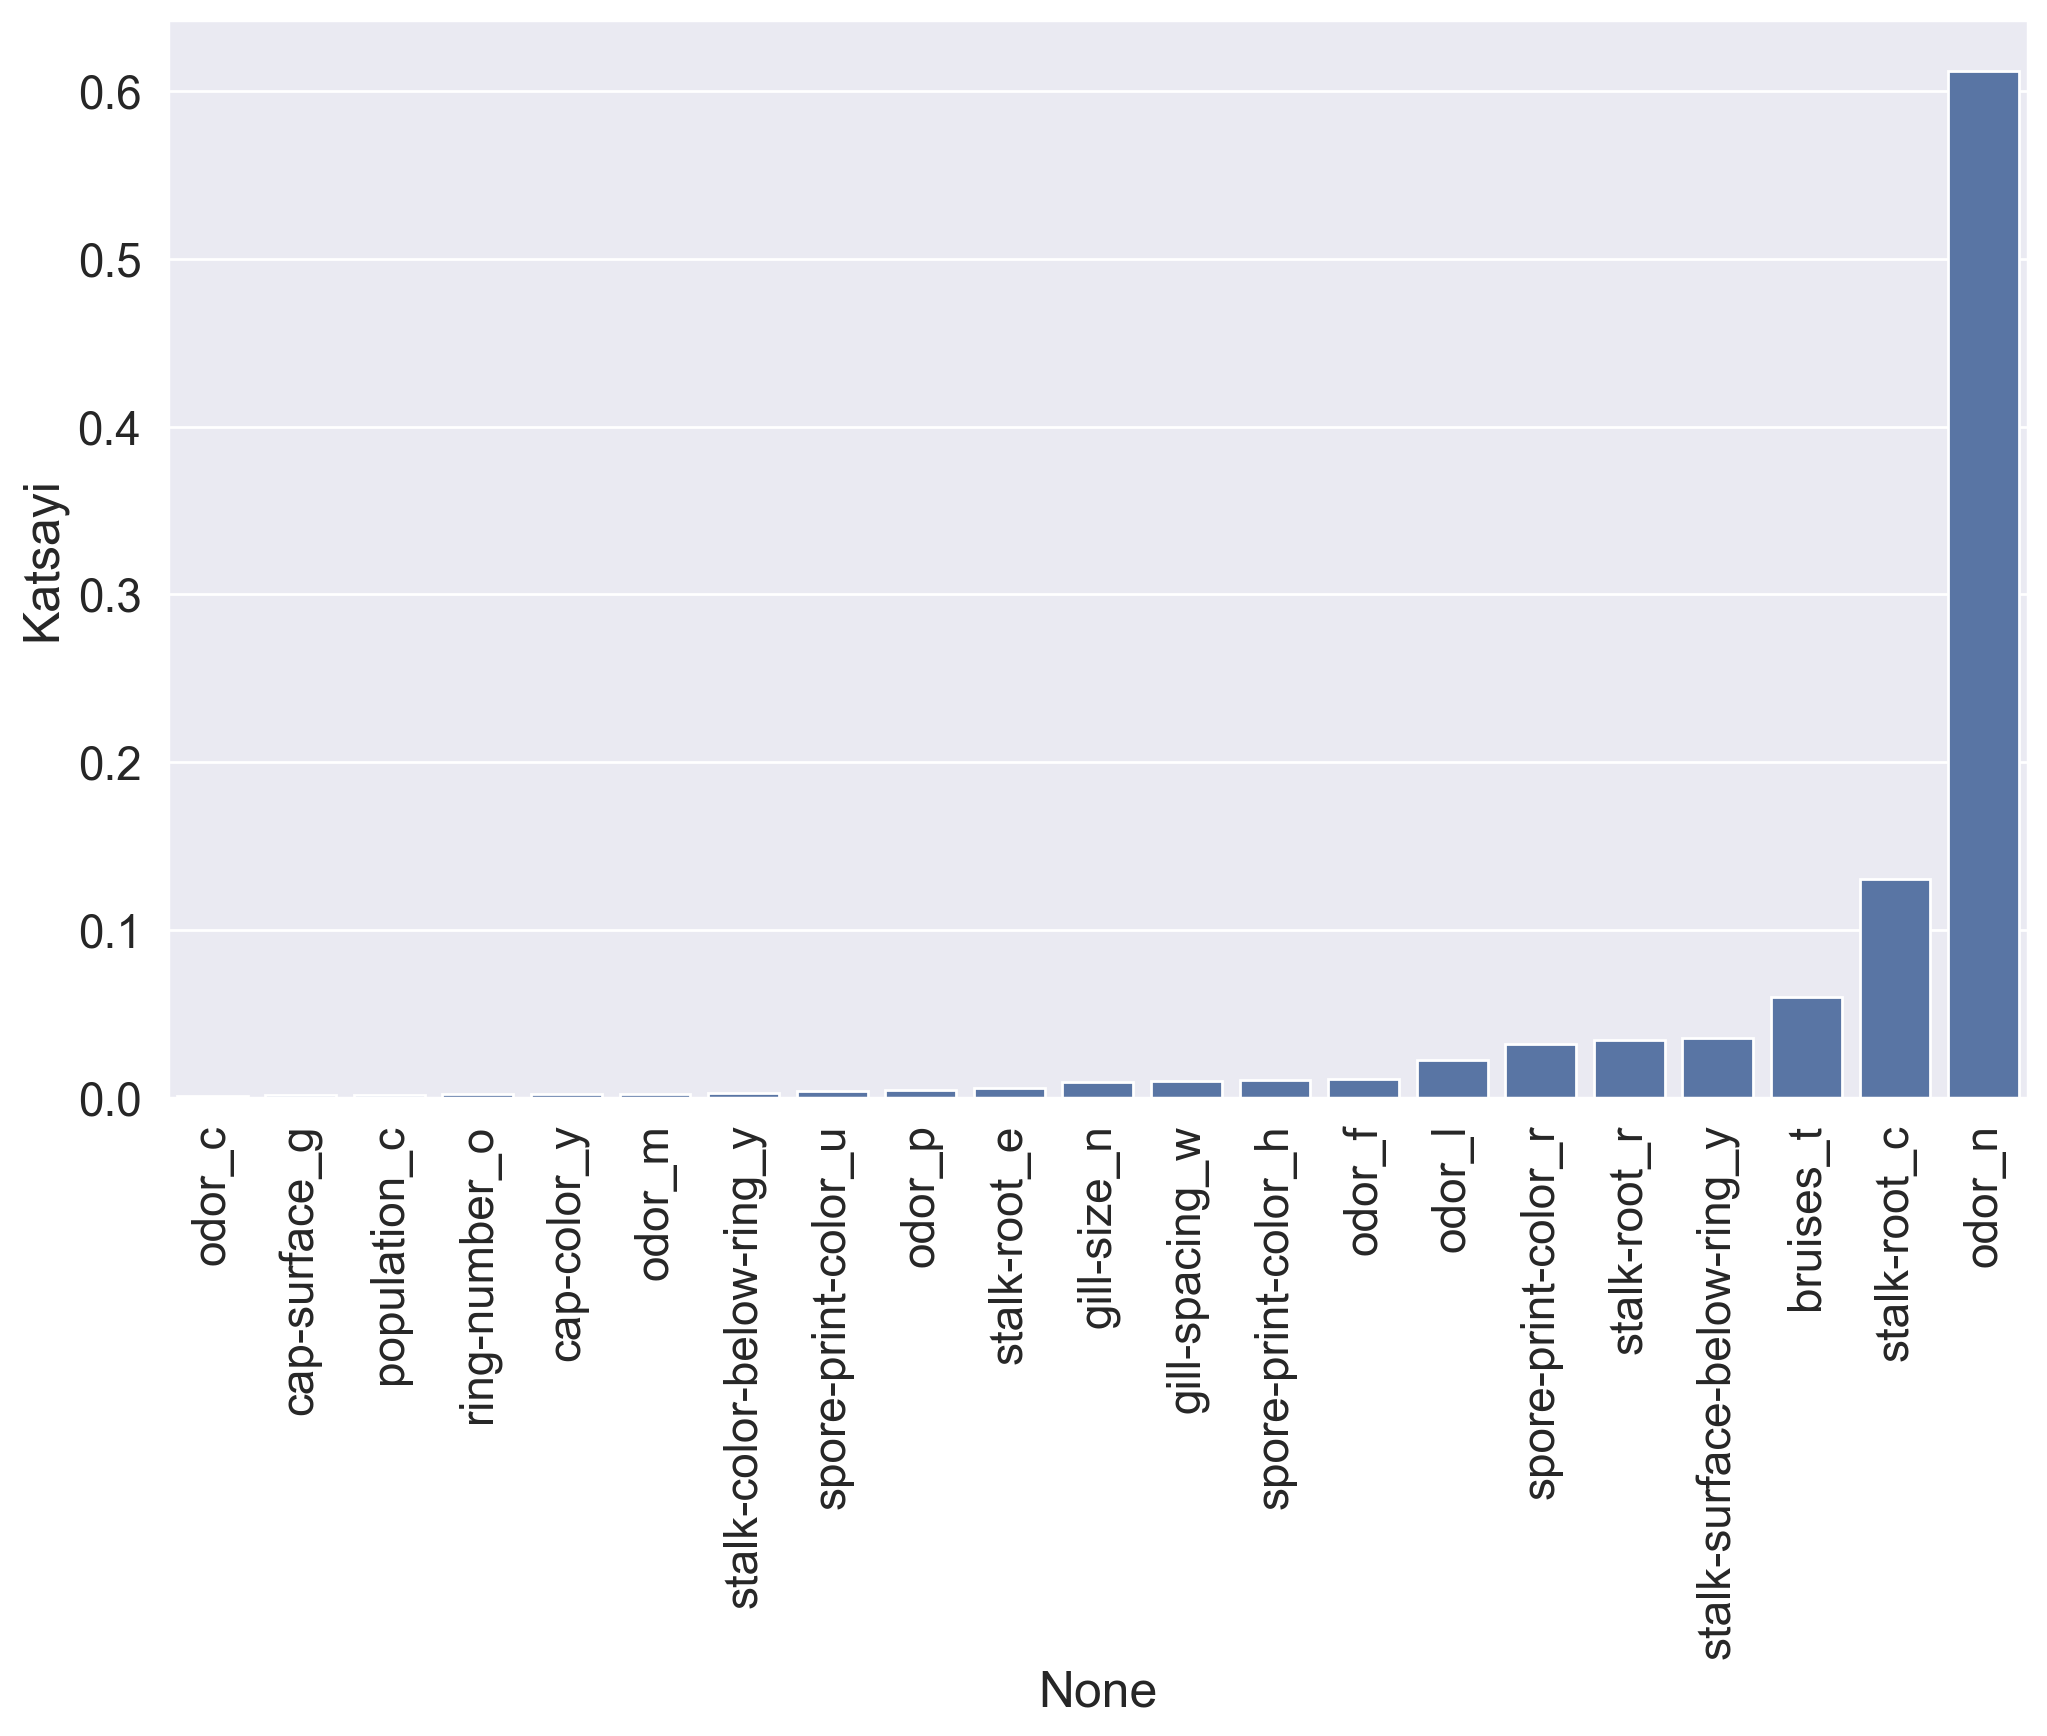

In [31]:
plt.figure(figsize=(12,7), dpi=200)

sns.set_style("whitegrid")
sns.set_theme(font_scale= 1.5)

sns.barplot(x=feat_df.sort_values("Katsayi").index, y = "Katsayi", data=feat_df.sort_values("Katsayi"))
plt.xticks(rotation = 90);